### Import lib

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### Loading Data

In [2]:
df = pd.read_csv("Concrete_Data.csv")

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Renaming columns name

In [4]:
df.columns = ['cement','blastFurnace','flyAsh','water','superplasticizer','courseAggregate','fineaggregate','age','strength']

In [5]:
df

,cement,blastFurnace,flyAsh,water,superplasticizer,courseAggregate,fineaggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


### Data Cleaning

In [6]:
df.shape

(1030, 9)

In [7]:
df.isnull().sum()

cement              0
blastFurnace        0
flyAsh              0
water               0
superplasticizer    0
courseAggregate     0
fineaggregate       0
age                 0
strength            0
dtype: int64

There are no null values in the data.

In [8]:
df.duplicated().sum()

25

In [9]:
df.drop_duplicates()

,cement,blastFurnace,flyAsh,water,superplasticizer,courseAggregate,fineaggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   blastFurnace      1030 non-null   float64
 2   flyAsh            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   courseAggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [11]:
df.describe()

,cement,blastFurnace,flyAsh,water,superplasticizer,courseAggregate,fineaggregate,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


#### Observations:
1. All of the data in the dataset is numerical
2. No null/NAN data
3. Age data appears to have outliers because max value is very large as compared to 3rd IQR value

### Checking the pairwise relations of Features.

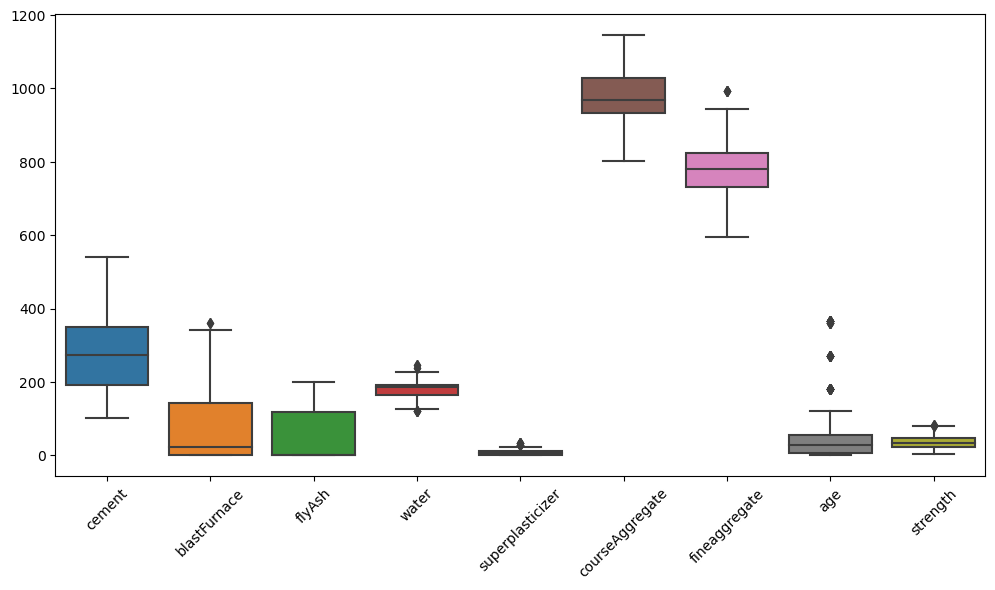

In [12]:
plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observations
1. Age column appears to be having maximum number of outliers \
2. blastfurnace, Water, superplastic, fineagg features have some outliers


In [13]:
corr = df.corr()

<Axes: >

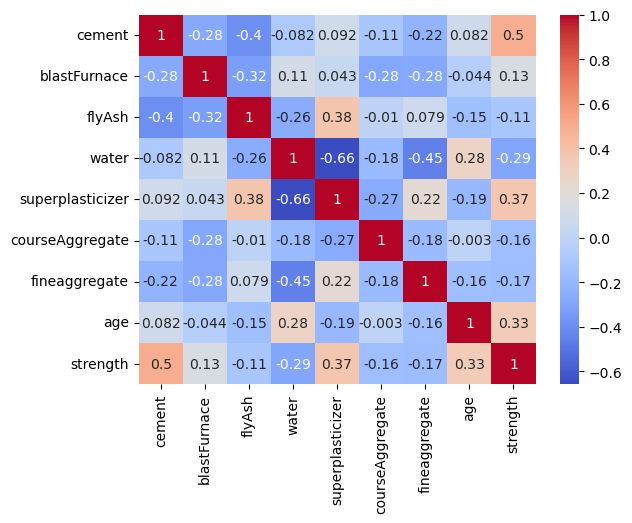

In [14]:
m n  

#### Observations:

1. Cement has strong correlation with strength
2. Water appears to have a negative correlation with strength
3. Superplastic appears to have positive correlation with strength
4. age also has strong correlation with strength
5. Water have strong negative correlation

### Data Preprocessing

In [15]:
# Split the data into features and target
from sklearn.model_selection import train_test_split
X = df.drop("strength", axis=1)
y = df["strength"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

### plotting the distribution without any trasnformation

C:\Users\abhishek\AppData\Local\Temp\ipykernel_15652\1596185228.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


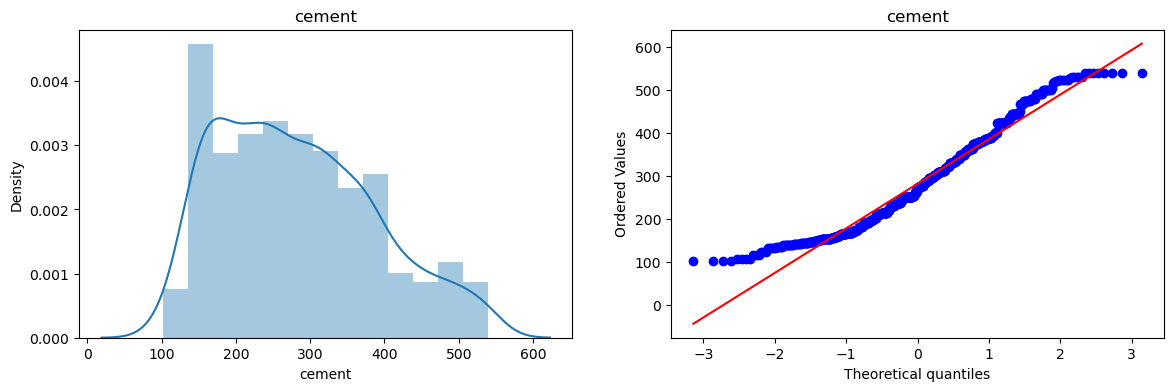

C:\Users\abhishek\AppData\Local\Temp\ipykernel_15652\1596185228.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


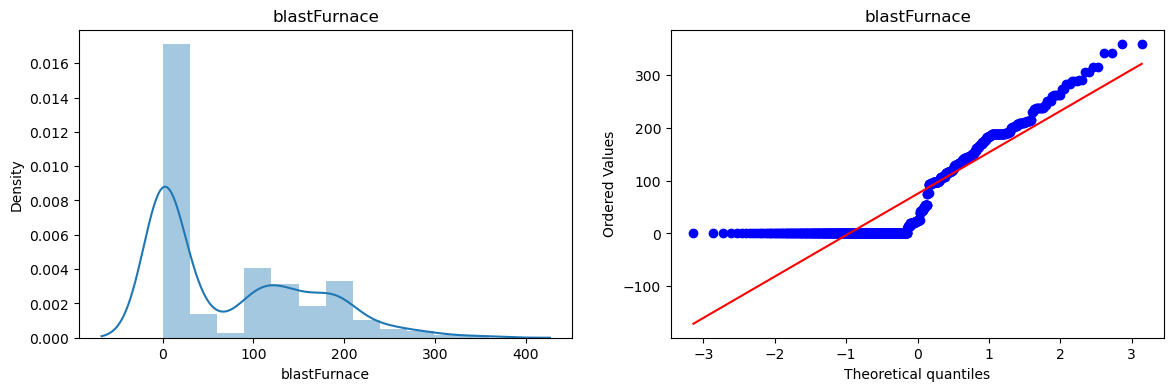

C:\Users\abhishek\AppData\Local\Temp\ipykernel_15652\1596185228.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


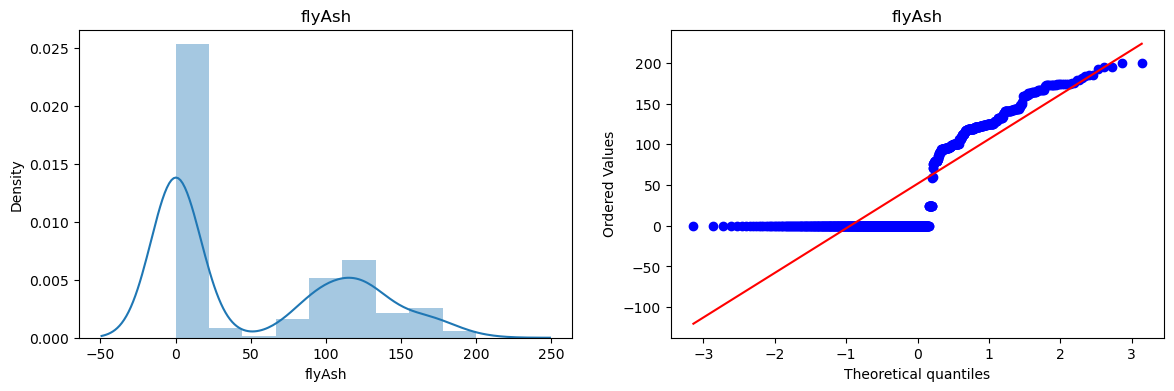

C:\Users\abhishek\AppData\Local\Temp\ipykernel_15652\1596185228.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


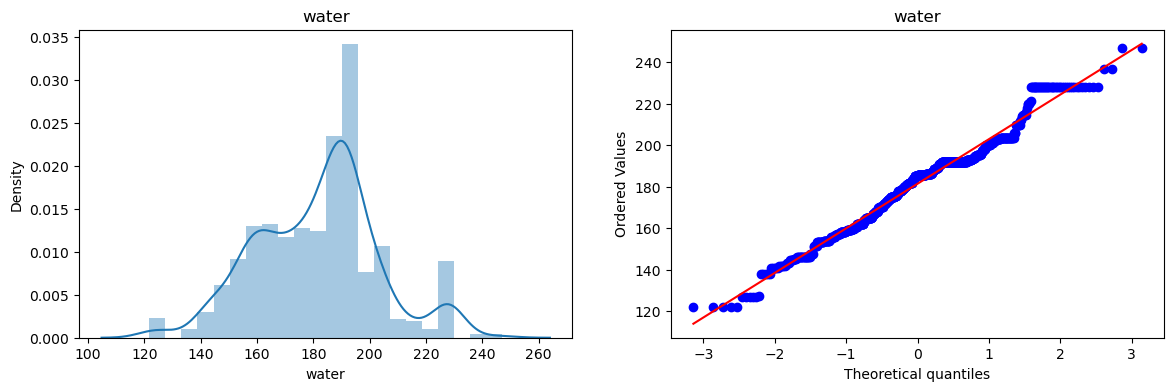

C:\Users\abhishek\AppData\Local\Temp\ipykernel_15652\1596185228.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


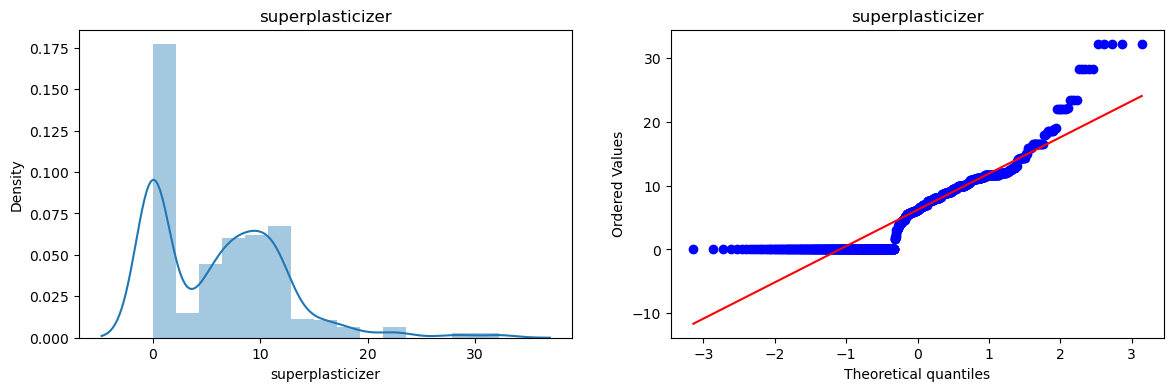

C:\Users\abhishek\AppData\Local\Temp\ipykernel_15652\1596185228.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


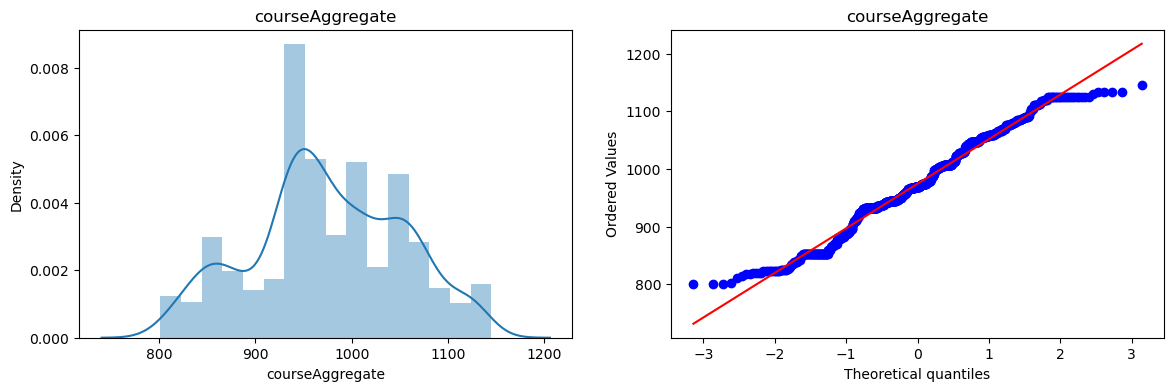

C:\Users\abhishek\AppData\Local\Temp\ipykernel_15652\1596185228.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


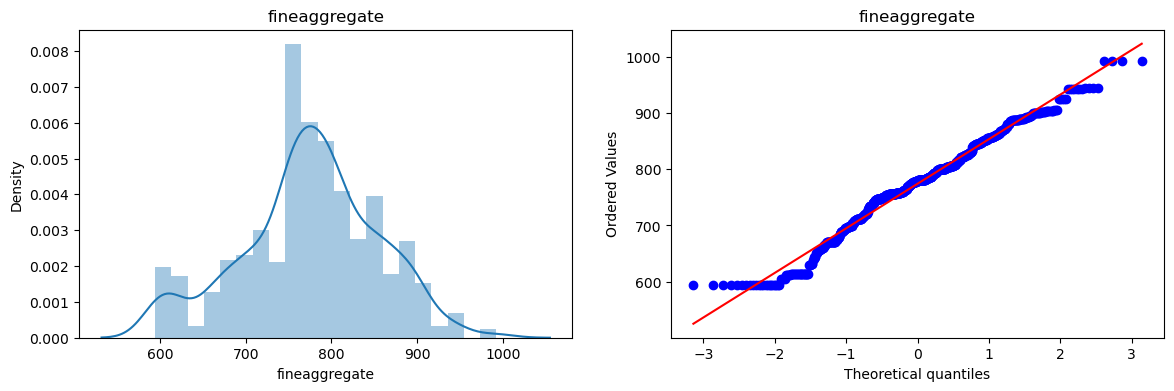

C:\Users\abhishek\AppData\Local\Temp\ipykernel_15652\1596185228.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


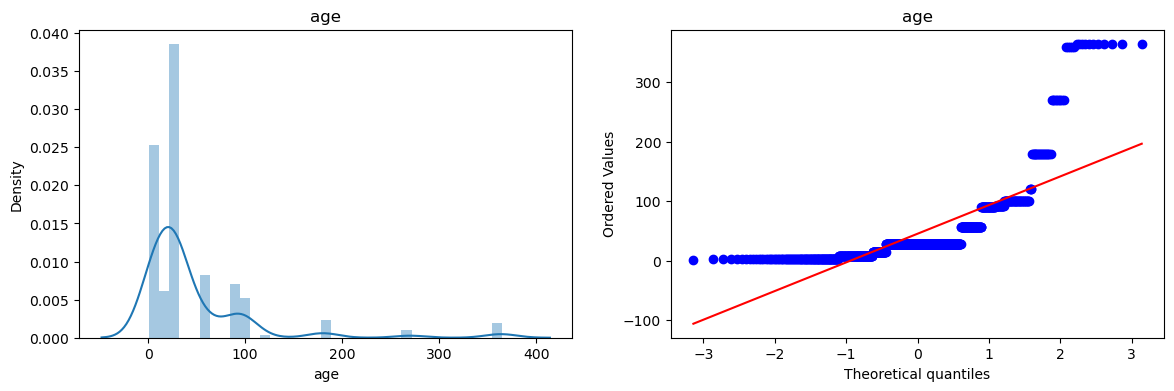

In [16]:
# input_features (input)
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)
 
    
    
    plt.subplot(122)
    stats.probplot(X_train[col], dist='norm',plot=plt)
    plt.title(col)
    plt.show()
    

#### Observations
1. Distribution of cement appears nearly normal
2. Blastfurnace and flyash has 2 gaussians and is skewed
3. Water and Superplastic have nearly to the normal distributions
4. Age data has long tail which confirms the presence of outliers.

### Applying PowerTransform

In [17]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox') # by heo johnson

In [18]:
X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transoformed = pt.transform(X_test+0.000001)

In [19]:
X_train_transformed

array([[-1.44658899,  0.89986738,  1.12148496, ..., -0.28147211,
         0.03510503,  0.130788  ],
       [-0.58929943,  0.92641251, -0.88067075, ..., -0.01952877,
        -0.34101118, -1.67298715],
       [ 0.39978159,  0.92818005,  1.13511658, ..., -0.77934968,
        -1.50377082,  0.130788  ],
       ...,
       [-0.38636741, -1.11748645,  1.13965622, ...,  0.68781323,
        -0.24676066,  1.23573905],
       [-0.17806921, -1.11748645,  1.1266751 , ...,  0.16598595,
         1.49221972,  0.130788  ],
       [-1.52661609,  0.60744514,  1.17539788, ...,  0.59559933,
        -0.83728589,  0.130788  ]])

### Again Distribution

C:\Users\abhishek\AppData\Local\Temp\ipykernel_15652\178508043.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\abhishek\AppData\Local\Temp\ipykernel_15652\178508043.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


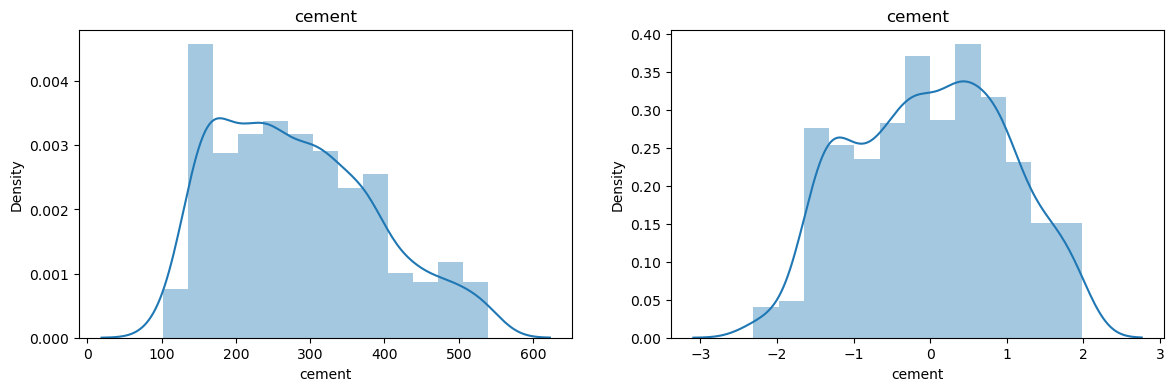

C:\Users\abhishek\AppData\Local\Temp\ipykernel_15652\178508043.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\abhishek\AppData\Local\Temp\ipykernel_15652\178508043.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


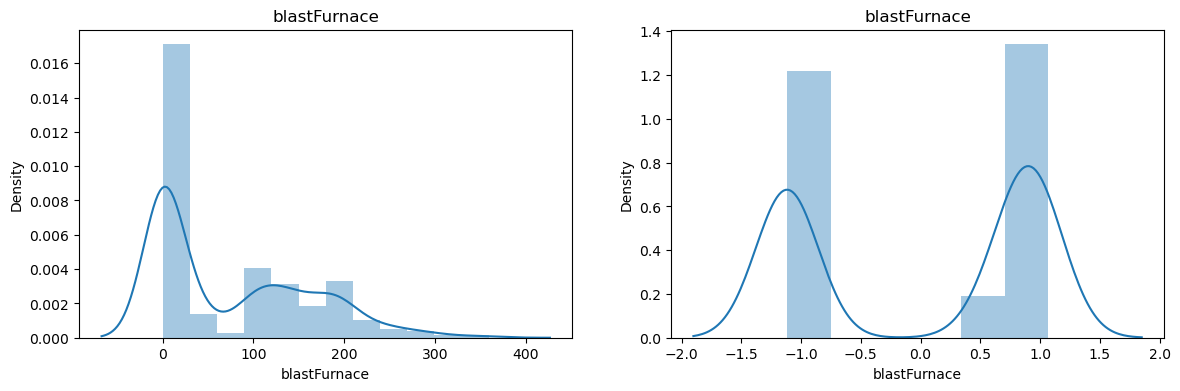

C:\Users\abhishek\AppData\Local\Temp\ipykernel_15652\178508043.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\abhishek\AppData\Local\Temp\ipykernel_15652\178508043.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


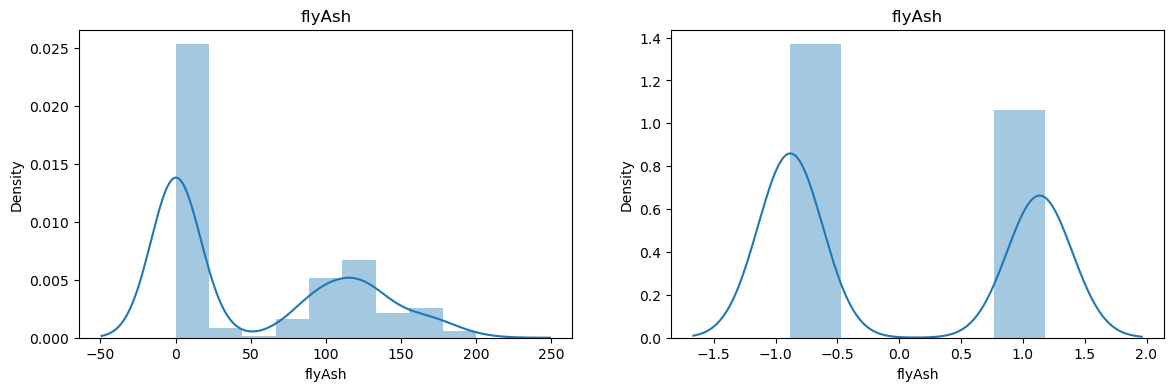

C:\Users\abhishek\AppData\Local\Temp\ipykernel_15652\178508043.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\abhishek\AppData\Local\Temp\ipykernel_15652\178508043.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


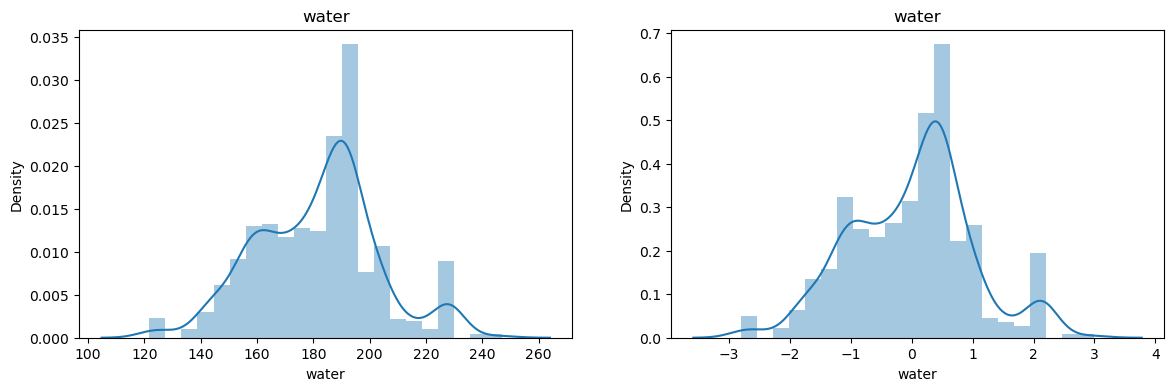

C:\Users\abhishek\AppData\Local\Temp\ipykernel_15652\178508043.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\abhishek\AppData\Local\Temp\ipykernel_15652\178508043.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


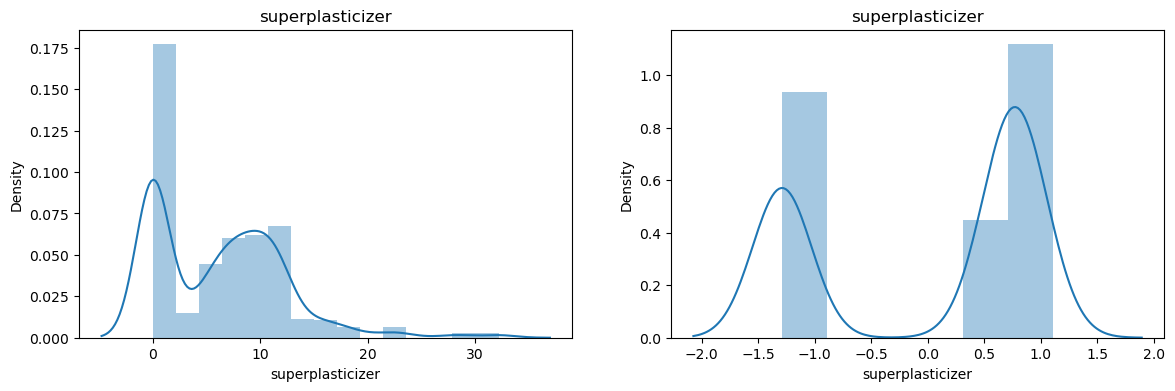

C:\Users\abhishek\AppData\Local\Temp\ipykernel_15652\178508043.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\abhishek\AppData\Local\Temp\ipykernel_15652\178508043.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


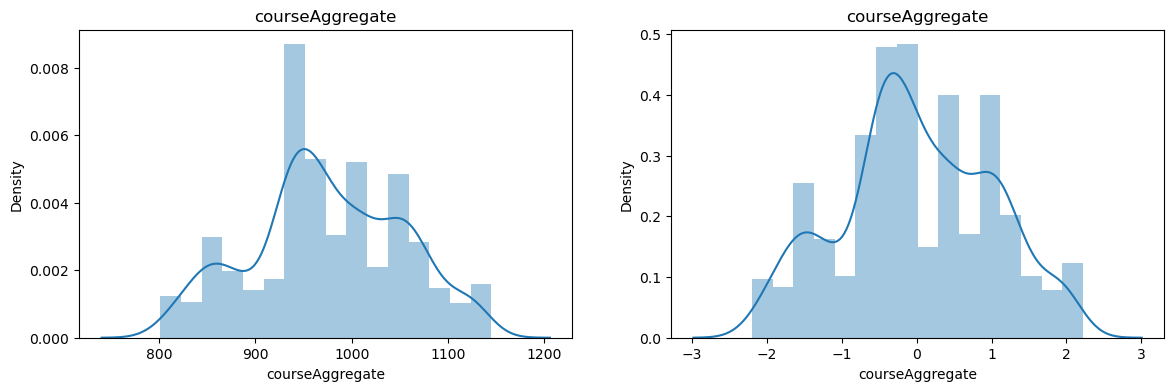

C:\Users\abhishek\AppData\Local\Temp\ipykernel_15652\178508043.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\abhishek\AppData\Local\Temp\ipykernel_15652\178508043.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


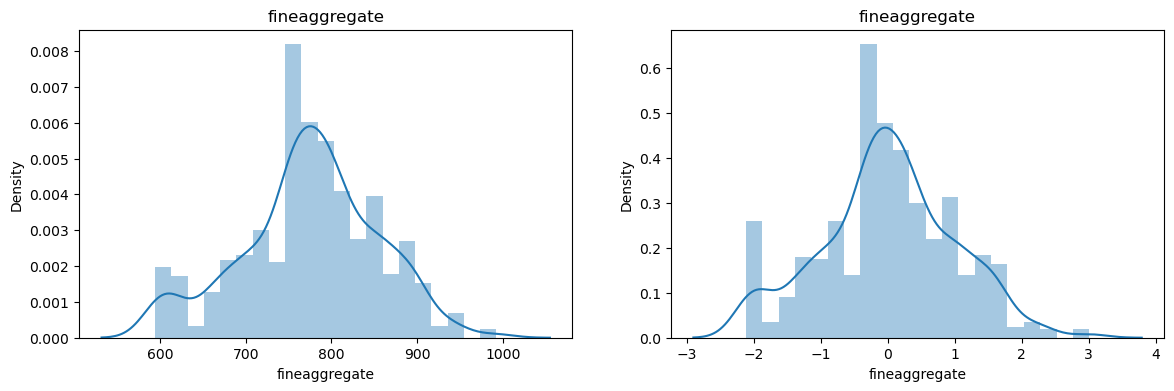

C:\Users\abhishek\AppData\Local\Temp\ipykernel_15652\178508043.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\abhishek\AppData\Local\Temp\ipykernel_15652\178508043.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


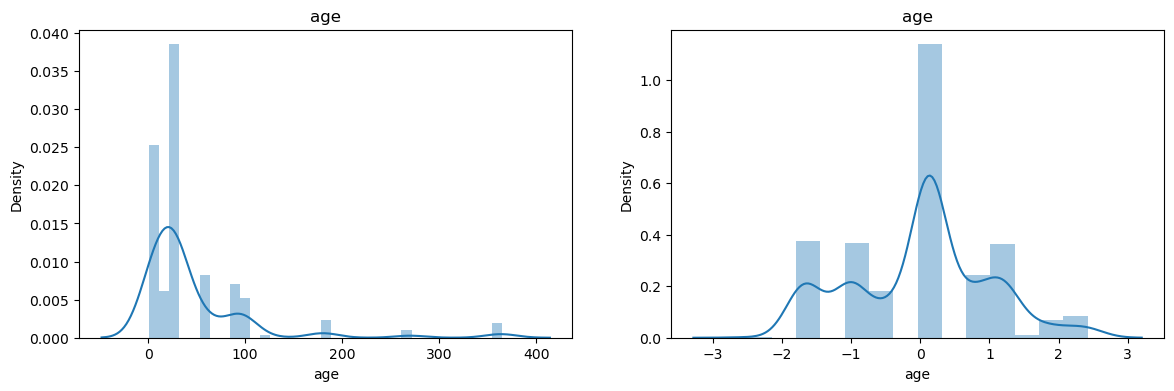

In [20]:
# input_features (input)
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)
 
    
    
#     # QQ plot
    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)
    plt.show()

### Scaling the Data

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()



# Apply transform to both the training set and the test set.
X_train_transformed = scaler.fit_transform(X_train_transformed)
X_test_transoformed = scaler.transform(X_test_transoformed)


C:\Users\abhishek\DSA\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
X_train_transformed

array([[-1.44658899,  0.89986738,  1.12148496, ..., -0.28147211,
         0.03510503,  0.130788  ],
       [-0.58929943,  0.92641251, -0.88067075, ..., -0.01952877,
        -0.34101118, -1.67298715],
       [ 0.39978159,  0.92818005,  1.13511658, ..., -0.77934968,
        -1.50377082,  0.130788  ],
       ...,
       [-0.38636741, -1.11748645,  1.13965622, ...,  0.68781323,
        -0.24676066,  1.23573905],
       [-0.17806921, -1.11748645,  1.1266751 , ...,  0.16598595,
         1.49221972,  0.130788  ],
       [-1.52661609,  0.60744514,  1.17539788, ...,  0.59559933,
        -0.83728589,  0.130788  ]])

### Model Choice

###### Model Building
Training Machine Learning Algorithms on the training data and making predictions on Test data.

###### 1. Linear Regression

    - Linear Regression - No regularisation
    - Lasso Regression - L1 regularisation (Tries to push coefficients to zero)
    - Ridge Regression - L2 regularisation (Tries to keep coefficients as low as possible) comparing these three algorithms
 
###### 2. Decision Trees
###### 3. XGBRegressor

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
# Define the regression models
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'xgb': XGBRegressor(),
    
}

for name ,md in models.items():
    md.fit(X_train_transformed,y_train)
    y_pred = md.predict(X_test_transoformed)
    
    print(f"{name} \t  MSE: {mean_squared_error(y_test,y_pred)} \t\t r2_score : {r2_score(y_test,y_pred)}")
   

Linear 	  MSE: 56.367877004322025 		 r2_score : 0.7723049697470573
Ridge 	  MSE: 56.37045163326932 		 r2_score : 0.7722945696708579
Lasso 	  MSE: 64.2507946803425 		 r2_score : 0.7404623445833437
xgb 	  MSE: 17.659225423941407 		 r2_score : 0.9286665015459148



XgBoost Regressor is the best choice for this problem.

### Selecting best model

In [25]:
xgb = XGBRegressor()
xgb.fit(X_train_transformed,y_train)
y_pred = xgb.predict(X_test_transoformed)
r2_score(y_test,y_pred)

0.9286665015459148

### prediction Model

In [26]:
def predicion_system(cem,blastf,flyas,water,superplaster,courseagg,fineagg,age):
    features = np.array([[cem,blastf,flyas,water,superplaster,courseagg,fineagg,age]])
    prediction = xgb.predict(features).reshape(1,-1)
    
    return prediction[0]

In [27]:
cem = 540
blastf = 359.4
flyas = 200.1
water = 247.0
superplaster = 32.2
courseagg = 1145.0
fineagg = 992.6
age = 365.0

prediction = predicion_system(cem,blastf,flyas,water,superplaster,courseagg,fineagg,age)
print("strength is : ",prediction)

strength is :  [54.244137]


In [28]:
import pickle
pickle.dump(xgb,open('model.pkl','wb'))